<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">
This notebook is an element of the [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).

Author: Eric Marsden <eric.marsden@risk-engineering.org>.

---

In this notebook, we illustrate NumPy features for working with correlated data. Check the [associated lecture slides](https://risk-engineering.org/correlation/) for background material. 

# Linear correlation

In [1]:
import numpy
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
%config InlineBackend.figure_formats=['svg']

In [2]:
X = numpy.random.normal(10, 1, 100)
X

array([10.36154126, 10.16368505, 10.62393454,  8.79668963, 10.12595027,
       10.82909019, 11.04107324,  8.03719416, 10.16431678, 10.1405394 ,
        9.68220844, 10.58827463, 10.01328896, 11.14648301,  9.37197919,
        9.84210097,  9.47677961, 11.32319579,  9.80616963,  8.69611874,
        9.20325313, 10.21737164,  9.80592472,  9.72026662,  9.68241176,
       11.92858129,  8.09667346,  9.88193802,  8.98816882, 11.09783274,
        7.88762319, 10.12772386, 11.6440422 ,  9.30108878,  9.43796413,
       10.49615095, 10.95639922, 10.39694259, 10.41452195,  8.68373636,
        9.23637054, 10.22026824,  9.31440022, 10.1907203 , 10.44177153,
       11.56899036, 10.54680011,  9.20940015, 10.44221484,  9.91715338,
       11.30568634,  9.37327471,  8.11020876, 10.59982894,  8.77713798,
       10.47726982,  9.39159319,  9.25934194, 10.89645885,  8.91246628,
        9.50897513,  9.53289994,  8.85874802,  9.73359873, 10.51501149,
       11.8477274 , 10.6320419 , 10.82016802,  9.67410936,  8.88

In [3]:
Y = -X + numpy.random.normal(0, 1, 100)

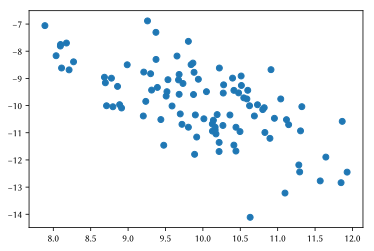

In [4]:
plt.scatter(X, Y);

Looking at the scatterplot above, we can see that the random variables $X$ and $Y$ are *correlated*. There are various statistical measures that allow us to quantify the degree of linear correlation. The most commonly used is [Pearson’s product-moment correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient). It is available in `scipy.stats`. 

In [5]:
scipy.stats.pearsonr(X, Y)

(-0.6432244071889837, 5.338401261314037e-13)

The first return value is the linear correlation coefficient, a value between -1 and 1 which measures the strength of the linear correlation. A value greater than 0.9 indicates a strong positive linear correlation, and a value lower than -0.9 indicates strong negative linear correlation (when $X$ increases, $Y$ decreases).

(The second return value is a *p-value*, which is a measure of the confidence which can be placed in the estimation of the correlation coefficient (smaller = more confidence). It tells you the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. Here we have a very very low p-value, so high confidence in the estimated value of the correlation coefficient.)

## Exercises

**Exercise**: show that when the error in $Y$ decreases, the correlation coefficient increases.

**Exercise**: produce data and a plot with a negative correlation coefficient.

## Anscombe’s quartet

Let’s examine four datasets produced by the statistician [Francis Anscombe](https://en.wikipedia.org/wiki/Frank_Anscombe) to illustrate the importance of exploring your data qualitatively (for example by plotting the data), rather than relying only on summary statistics such as the linear correlation coefficient.

In [6]:
x =  numpy.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = numpy.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = numpy.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = numpy.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = numpy.array([8,8,8,8,8,8,8,19,8,8,8])
y4 = numpy.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

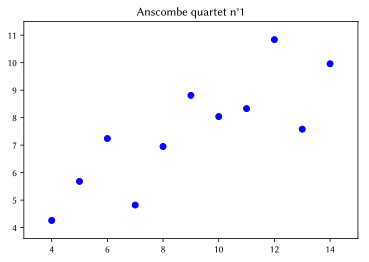

In [7]:
plt.plot(x, y1, 'ks', marker='o', color='blue')
plt.title(u"Anscombe quartet n°1")
plt.margins(0.1)

In [8]:
scipy.stats.pearsonr(x, y1)

(0.81642051634484, 0.002169628873078789)

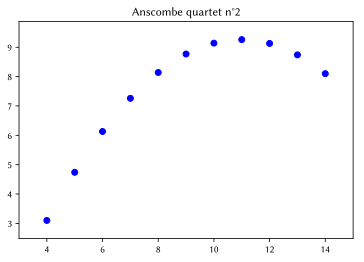

In [9]:
plt.plot(x, y2, 'ks', marker='o', color='blue')
plt.title(u"Anscombe quartet n°2")
plt.margins(0.1)

In [10]:
scipy.stats.pearsonr(x, y2)

(0.8162365060002427, 0.002178816236910803)

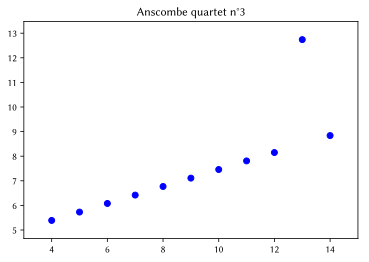

In [11]:
plt.plot(x, y3, 'ks', marker='o', color='blue')
plt.title(u"Anscombe quartet n°3")
plt.margins(0.1)

In [12]:
scipy.stats.pearsonr(x, y3)

(0.8162867394895981, 0.0021763052792280304)

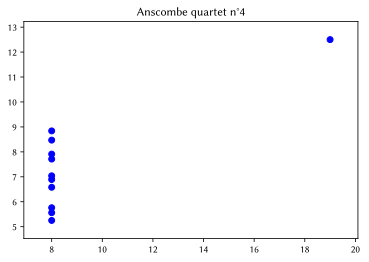

In [13]:
plt.plot(x4, y4, 'ks', marker='o', color='blue')
plt.title("Anscombe quartet n°4")
plt.margins(0.1)

In [14]:
scipy.stats.pearsonr(x4, y4)

(0.816521436888503, 0.0021646023471972127)

Notice that the linear correlation coefficient of the four datasets is identical, though clearly the relationship between $X$ and $Y$ is very different in each case! This illustrates the risks of depending only on quantitative descriptors to understand your datasets: you should also use different types of plots to give you a better overview of the data.